# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [2]:
!pip install dataprep

     |████████████████████████████████| 1.8 MB 820 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 848 kB 55.0 MB/s eta 0:00:01
     |████████████████████████████████| 125 kB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 719 kB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 51.6 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 743 kB 50.9 MB/s eta 0:00:01
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13905 sha256=19fb5cc06cd503d56d6db0a5ed4cad823e38a52af314d908de52f6ebcb2f5718
  Stored in directory: /root/.cache/pip/wheels/1d/a8/cb/6f8902aa5457bd71344e00665c230e9c45255b3f57f2194a0f
Successfully built metaphone
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.0.1
    Uninstalling Jinja2-3.0.1:
      Successfully uninstalled Jinja2-3.0.1
  Attempt

In [4]:
df = pd.read_csv("/kaggle/input/shared-bikes-demand-prediction/day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# dropping instant column
df = df.drop(['instant'],axis=1)

In [6]:
# cleaning comlumn names to make it more convinient to use
from dataprep.clean import clean_headers
df = clean_headers(df, case="pascal")

Column Headers Cleaning Report:
	15 values cleaned (100.0%)


In [7]:
df.head(10)

,Dteday,Season,Yr,Mnth,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Hum,Windspeed,Casual,Registered,Cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [8]:
# info of our data which includes size, datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dteday      499 non-null    object 
 1   Season      499 non-null    int64  
 2   Yr          499 non-null    int64  
 3   Mnth        499 non-null    int64  
 4   Holiday     499 non-null    int64  
 5   Weekday     499 non-null    int64  
 6   Workingday  499 non-null    int64  
 7   Weathersit  499 non-null    int64  
 8   Temp        499 non-null    float64
 9   Atemp       499 non-null    float64
 10  Hum         499 non-null    float64
 11  Windspeed   499 non-null    float64
 12  Casual      499 non-null    int64  
 13  Registered  499 non-null    int64  
 14  Cnt         499 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 58.6+ KB


In [9]:
# percentage of null values in dataset
(df.isna().sum()/len(df))*100

Dteday        0.0
Season        0.0
Yr            0.0
Mnth          0.0
Holiday       0.0
Weekday       0.0
Workingday    0.0
Weathersit    0.0
Temp          0.0
Atemp         0.0
Hum           0.0
Windspeed     0.0
Casual        0.0
Registered    0.0
Cnt           0.0
dtype: float64

* We do not have any null values in the dataset.

In [10]:
# statistical info of data
df.describe()

,Season,Yr,Mnth,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Hum,Windspeed,Casual,Registered,Cnt
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2.206413,0.268537,5.515030,0.028056,2.995992,0.683367,1.408818,18.979325,22.316516,62.601307,13.212513,706.577154,3030.551102,3737.128257
std,1.095573,0.443643,3.459066,0.165299,2.009012,0.465630,0.557175,7.350670,8.038017,15.282889,5.278390,612.099032,1194.650805,1538.501032
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,9.000000,416.000000,431.000000
25%,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.998189,15.843550,50.666050,9.313000,226.500000,2111.500000,2463.000000
50%,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,18.518347,22.222300,62.666700,12.707689,603.000000,3176.000000,3926.000000
75%,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,25.215000,28.725925,73.791650,16.083618,900.000000,3845.500000,4761.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,42.044800,97.250000,34.000021,3252.000000,5950.000000,8362.000000


# Data Visualization

<AxesSubplot:>

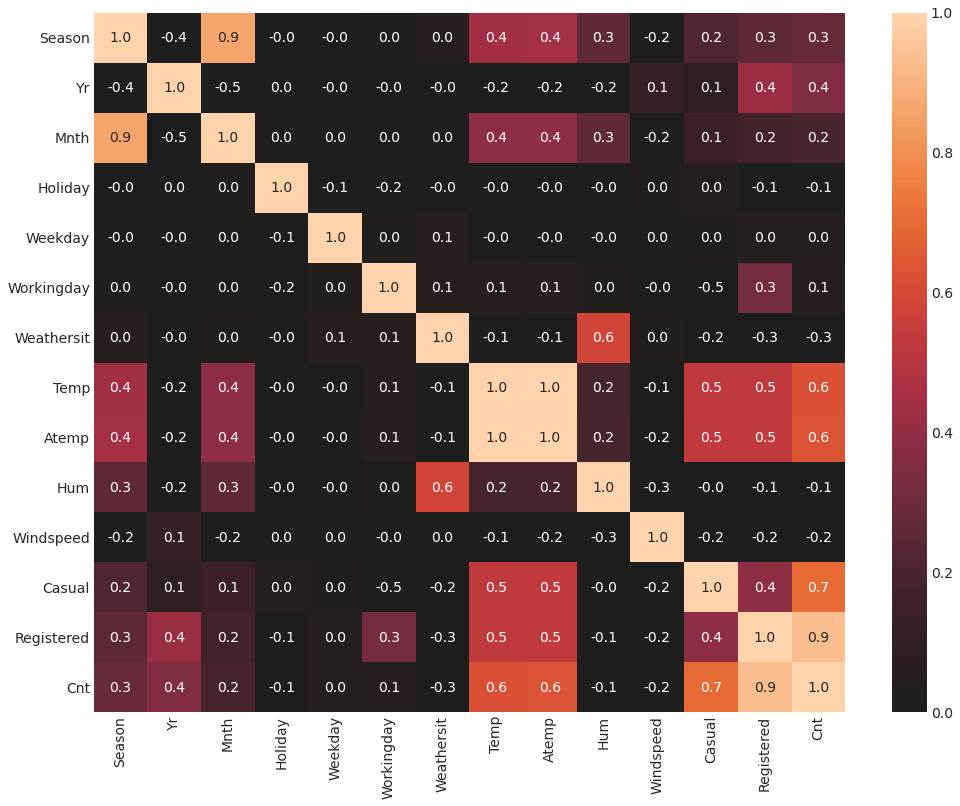

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), vmin=0, vmax=1, center=0, linecolor='black',fmt = '.1f', cmap="icefire",annot=True)

<AxesSubplot:>

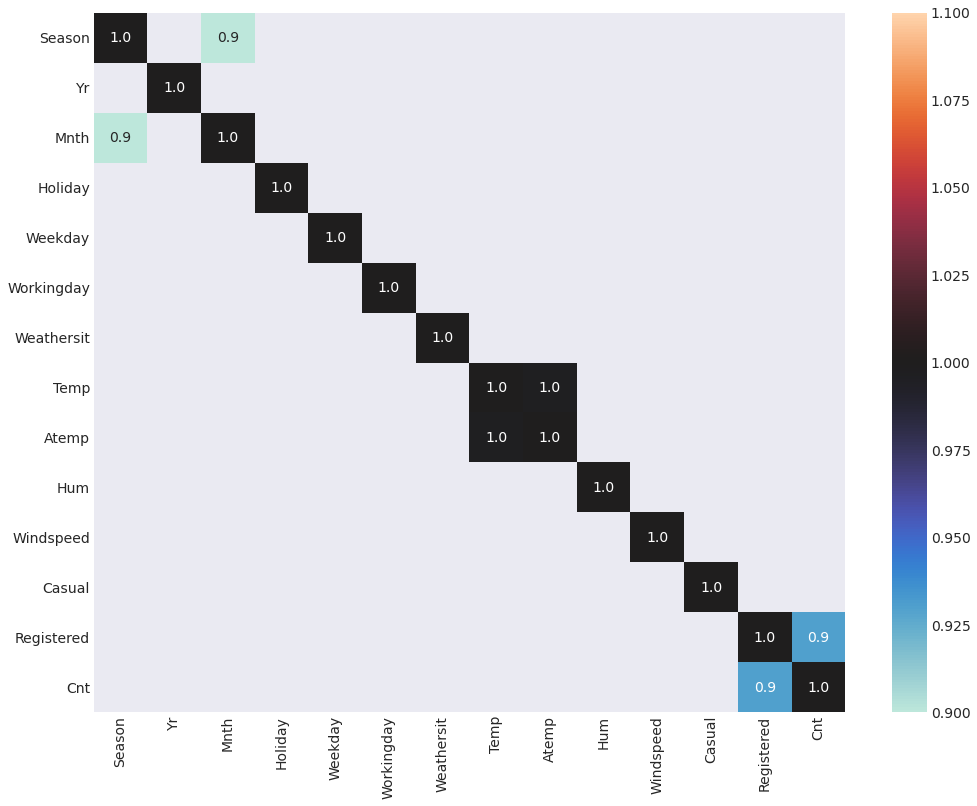

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), vmin=1, vmax=1, annot=True, cmap="icefire", fmt=".1f", mask= df.corr()<0.70)

In [30]:
pair1 = ["Season","Mnth"]
pair2 = ["Registered","Cnt"]

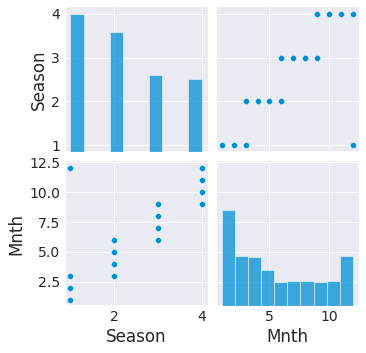

In [31]:
sns.pairplot(df, vars=pair1)

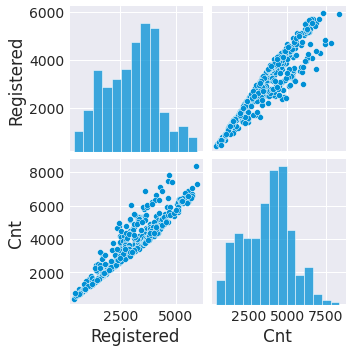

In [32]:
sns.pairplot(df,vars=pair2)

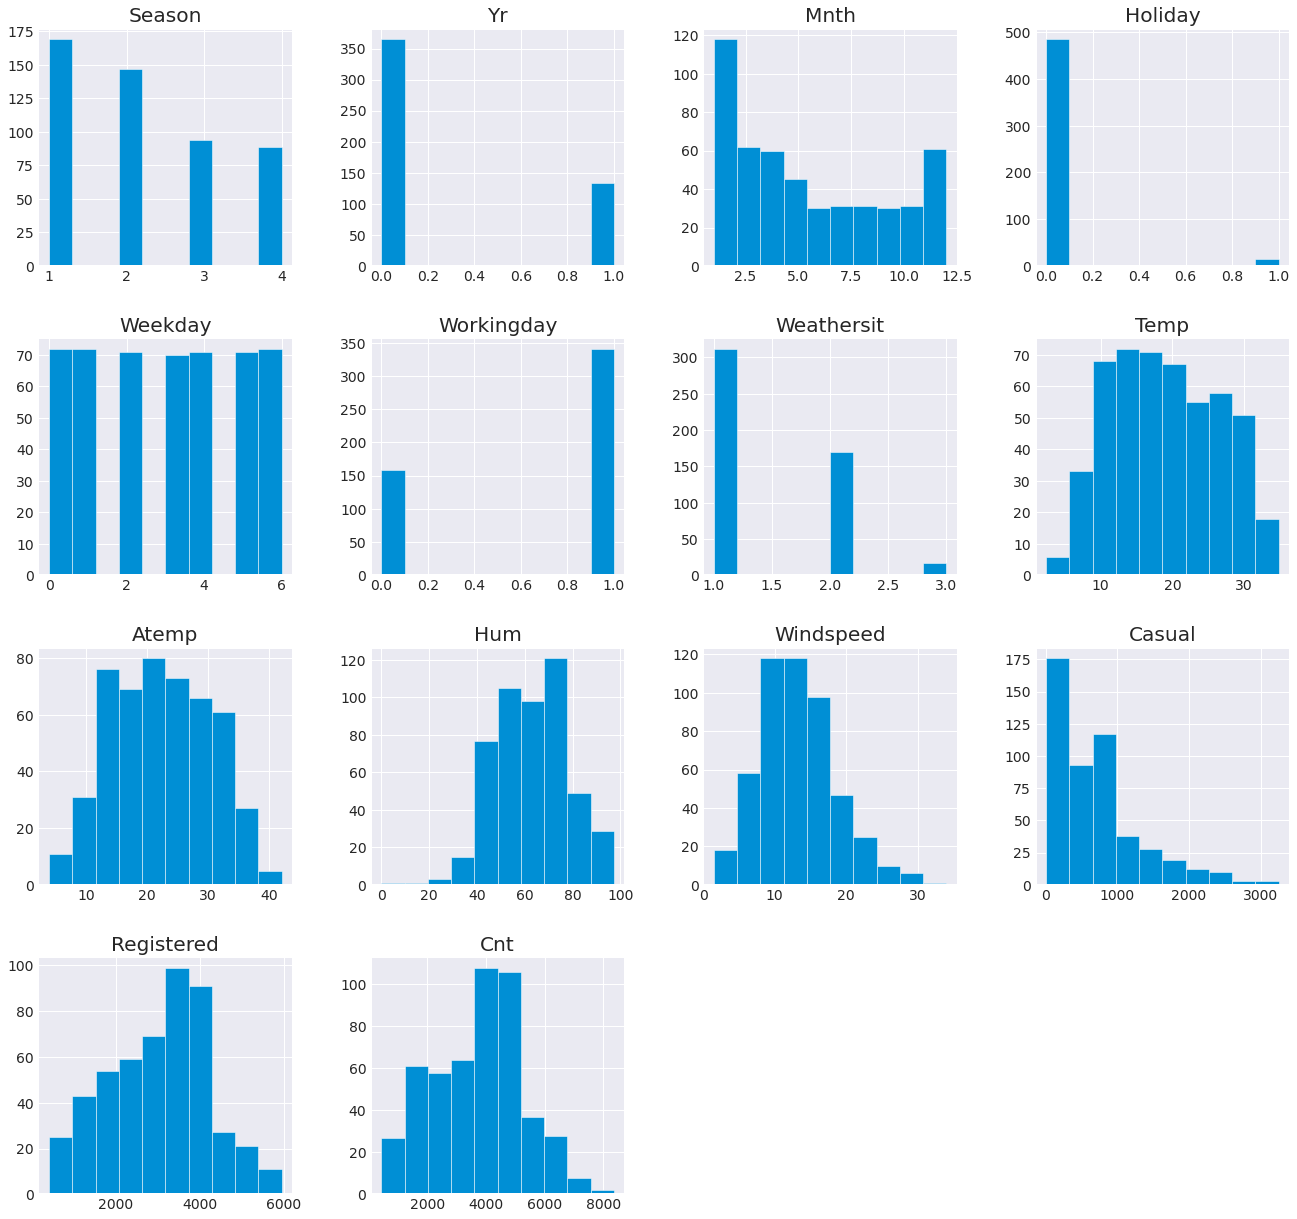

In [35]:
df.hist(figsize=(20, 20))
plt.show()

<AxesSubplot:xlabel='Weekday'>

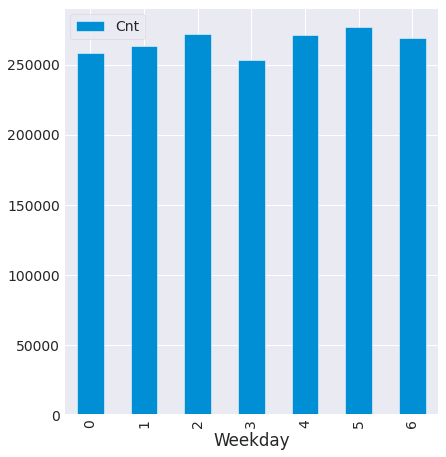

In [54]:
df[['Weekday', 'Cnt']].groupby(['Weekday']).sum().plot(kind="bar",figsize=(6,7))

# Feature Selection using chi-square test

In [12]:
from sklearn.feature_selection import chi2
f_p_values = chi2(df.drop(["Cnt","Dteday"],axis=1),df.Cnt)

In [13]:
f_p_values

(array([2.64111717e+02, 3.57552239e+02, 1.05378161e+03, 4.49357143e+02,
        6.47862876e+02, 1.51414956e+02, 1.05479374e+02, 1.38215248e+03,
        1.40429874e+03, 1.79728769e+03, 1.02267431e+03, 2.57541729e+05,
        2.33004060e+05]),
 array([1.00000000e+000, 9.99992444e-001, 4.98377938e-045, 8.38723301e-001,
        4.52669466e-007, 1.00000000e+000, 1.00000000e+000, 2.95637333e-088,
        2.03295088e-091, 3.43761109e-151, 2.25536451e-041, 0.00000000e+000,
        0.00000000e+000]))

In [14]:
pvalues = pd.Series(f_p_values[1])
fvalues = pd.Series(f_p_values[0])

In [21]:
fvalues.index = X.columns
fvalues.sort_values(ascending=False)

Casual        257541.728699
Registered    233004.060197
Hum             1797.287694
Atemp           1404.298738
Temp            1382.152484
Mnth            1053.781613
Windspeed       1022.674308
Weekday          647.862876
Holiday          449.357143
Yr               357.552239
Season           264.111717
Workingday       151.414956
Weathersit       105.479374
dtype: float64

In [23]:
pvalues.index = X.columns
pvalues.sort_values(ascending=True)

Casual         0.000000e+00
Registered     0.000000e+00
Hum           3.437611e-151
Atemp          2.032951e-91
Temp           2.956373e-88
Mnth           4.983779e-45
Windspeed      2.255365e-41
Weekday        4.526695e-07
Holiday        8.387233e-01
Yr             9.999924e-01
Season         1.000000e+00
Workingday     1.000000e+00
Weathersit     1.000000e+00
dtype: float64

<AxesSubplot:>

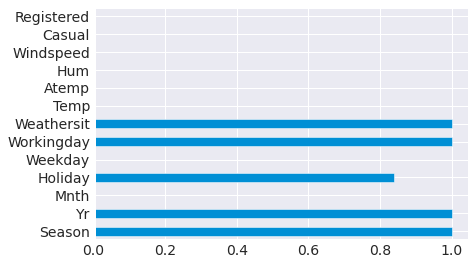

In [29]:
pvalues.plot(kind="barh")

<div class="alert alert-box alert-info">
Discarding [Season, Workingday, Weathersit, Yr] Columns from the data according to their feature importance as observed from chi-square test.
</div>

# Model Training...🚴

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
X = df.drop(["Cnt","Dteday","Season","Workingday","Weathersit","Yr"], axis=1)
y = df.Cnt

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
print(X_train.shape)
print(y_train.shape)

(374, 9)
(374,)


In [33]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Prediction...🎯

In [35]:
pred = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})

In [66]:
pred.head(10)

,Actual,Prediction
200,4332,4332.0
219,4326,4326.0
403,2802,2802.0
197,5302,5302.0
205,3840,3840.0
422,4322,4322.0
421,3389,3389.0
470,6370,6370.0
362,2423,2423.0
135,3958,3958.0


In [37]:
r2_score(y_pred, y_test)

1.0

In [38]:
import math
print(f"MEAN SQUARED ERROR: {mean_squared_error(y_test, y_pred)}")
print(f"ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MEAN SQUARED ERROR: 1.770786896322894e-24
ROOT MEAN SQUARED ERROR: 1.33070917045119e-12


<AxesSubplot:ylabel='Cnt'>

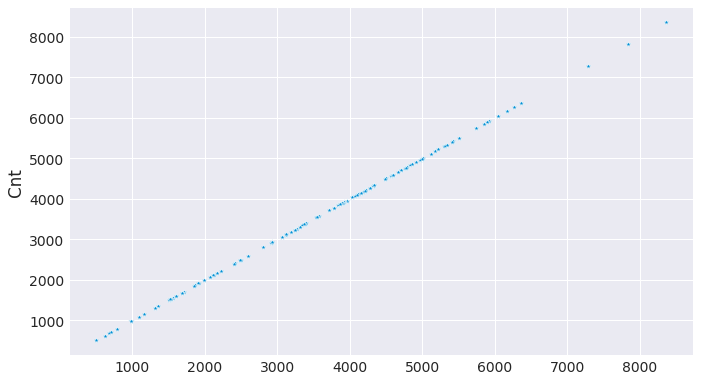

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred,y=y_test,marker="*")

<div class="alert alert-box alert-warning">
M.S.E can be reduced by applying GridSearchCV or RandomizedSearchCV to obtain better results.
    </div>

<div class="alert alert-box alert-info">
Thank you!
</div>